In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.style.use('bmh')

In [14]:
train = pd.read_csv("Life_train.csv")
test = pd.read_csv("Life_test.csv")

train.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
2,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
3,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
4,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2


In [15]:
train.dtypes

Year                                 int64
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2489 entries, 0 to 2488
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2489 non-null   int64  
 1   Life expectancy                  2489 non-null   float64
 2   Adult Mortality                  2489 non-null   float64
 3   infant deaths                    2489 non-null   int64  
 4   Alcohol                          2322 non-null   float64
 5   percentage expenditure           2489 non-null   float64
 6   Hepatitis B                      2009 non-null   float64
 7   Measles                          2489 non-null   int64  
 8    BMI                             2461 non-null   float64
 9   under-five deaths                2489 non-null   int64  
 10  Polio                            2471 non-null   float64
 11  Total expenditure                2293 non-null   float64
 12  Diphtheria          

In [20]:
train.isna().sum()

Year                                 0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            167
percentage expenditure               0
Hepatitis B                        480
Measles                              0
 BMI                                28
under-five deaths                    0
Polio                               18
Total expenditure                  196
Diphtheria                          18
 HIV/AIDS                            0
GDP                                386
Population                         554
 thinness  1-19 years               28
 thinness 5-9 years                 28
Income composition of resources    146
Schooling                          146
dtype: int64

In [ ]:
columns_to_replace = train.columns[train.isna().any()].to_list()

for column in columns_to_replace:
    train[column].fillna(value=train[column].median(), inplace=True)
    test[column].fillna(value=test[column].median(), inplace=True)

In [7]:
train.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2.489000e+03,2489.000000,2489.000000,2489.000000,2489.000000
mean,2007.453998,69.135677,165.517075,31.925271,4.600060,719.997905,80.884520,2508.917638,38.197887,44.378063,82.441926,5.952891,82.095508,1.777581,7320.511081,1.267212e+07,4.837424,4.882974,0.625210,11.932864
std,4.593657,9.626188,125.091120,122.898636,3.884299,1968.953987,22.558349,11795.371317,19.807530,167.571112,23.339100,2.389415,23.861550,5.184826,12889.588550,5.318866e+07,4.410935,4.520630,0.205007,3.286925
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,4.100000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.000000,74.000000,0.000000,1.110000,4.344931,80.884520,0.000000,19.400000,0.000000,78.000000,4.380000,78.000000,0.100000,575.316640,4.352620e+05,1.600000,1.600000,0.498000,10.200000
50%,2007.000000,72.100000,144.000000,3.000000,4.170000,64.605901,87.000000,15.000000,42.800000,4.000000,93.000000,5.952891,92.000000,0.100000,3113.486350,3.688865e+06,3.400000,3.400000,0.659000,12.100000
75%,2011.000000,75.700000,228.000000,23.000000,7.380000,431.545247,96.000000,357.000000,56.100000,29.000000,97.000000,7.340000,97.000000,0.800000,7320.511081,1.267212e+07,7.100000,7.200000,0.772000,14.000000
max,2015.000000,89.000000,723.000000,1800.000000,17.310000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.600000


C:\Users\ПК\AppData\Local\Temp\ipykernel_17540\3188863111.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Life expectancy '], color='g', bins=100, hist_kws={'alpha': 0.4});


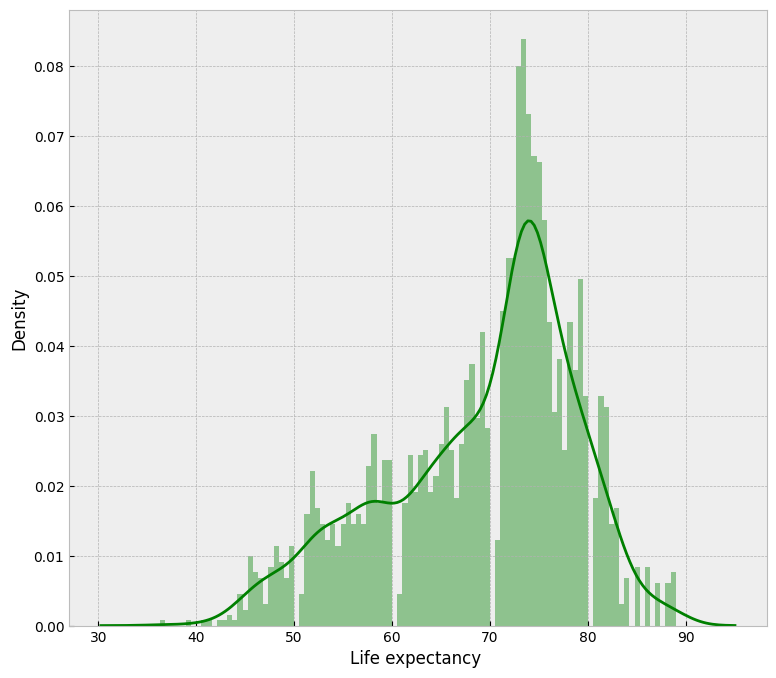

In [9]:
plt.figure(figsize=(9, 8))
sns.distplot(train['Life expectancy '], color='g', bins=100, hist_kws={'alpha': 0.4});

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Life expectancy '}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': 'infant deaths'}>],
       [<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'percentage expenditure'}>,
        <Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': 'Measles '}>],
       [<Axes: title={'center': ' BMI '}>,
        <Axes: title={'center': 'under-five deaths '}>,
        <Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Total expenditure'}>],
       [<Axes: title={'center': 'Diphtheria '}>,
        <Axes: title={'center': ' HIV/AIDS'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': ' thinness  1-19 years'}>,
        <Axes: title={'center': ' thinness 5-9 years'}>,
        <Axes: title={'center': 'Income composition of resources'}>,
        <Axes: title={'center

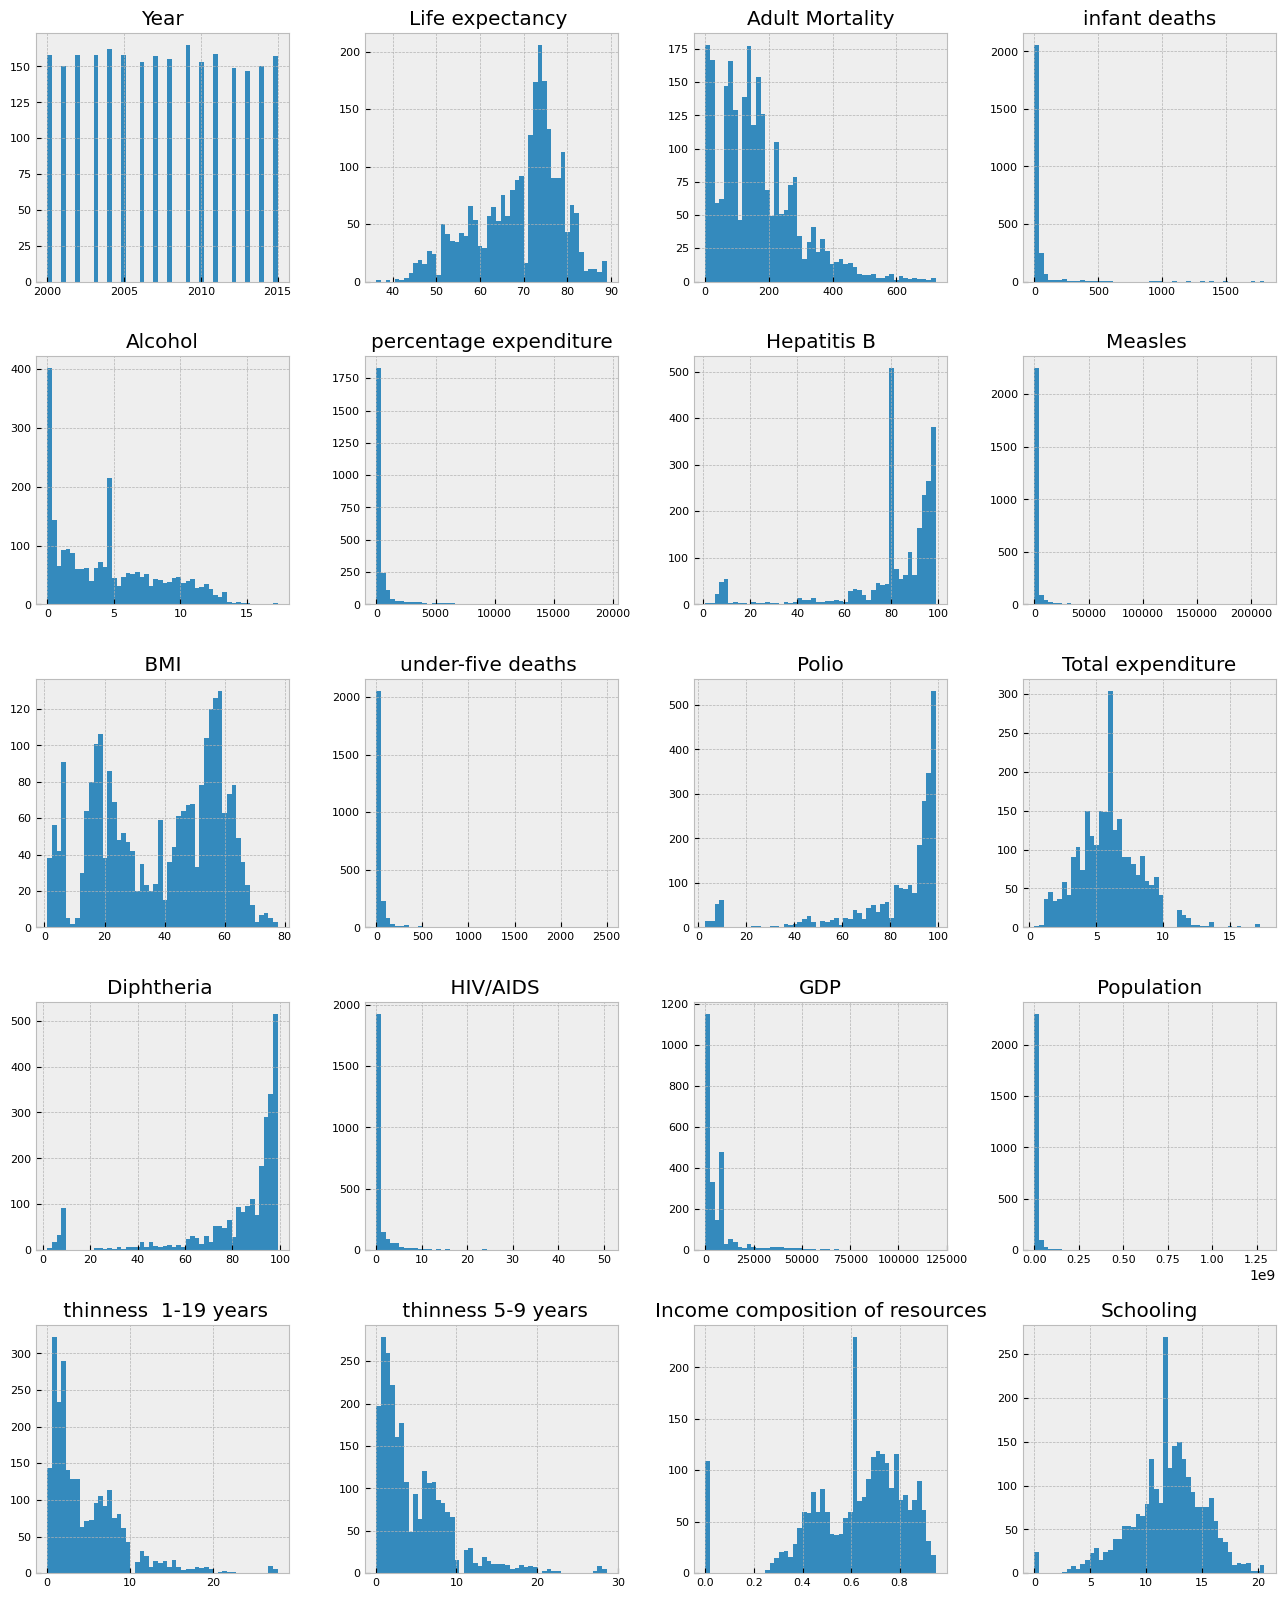

In [37]:
train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

<Axes: >

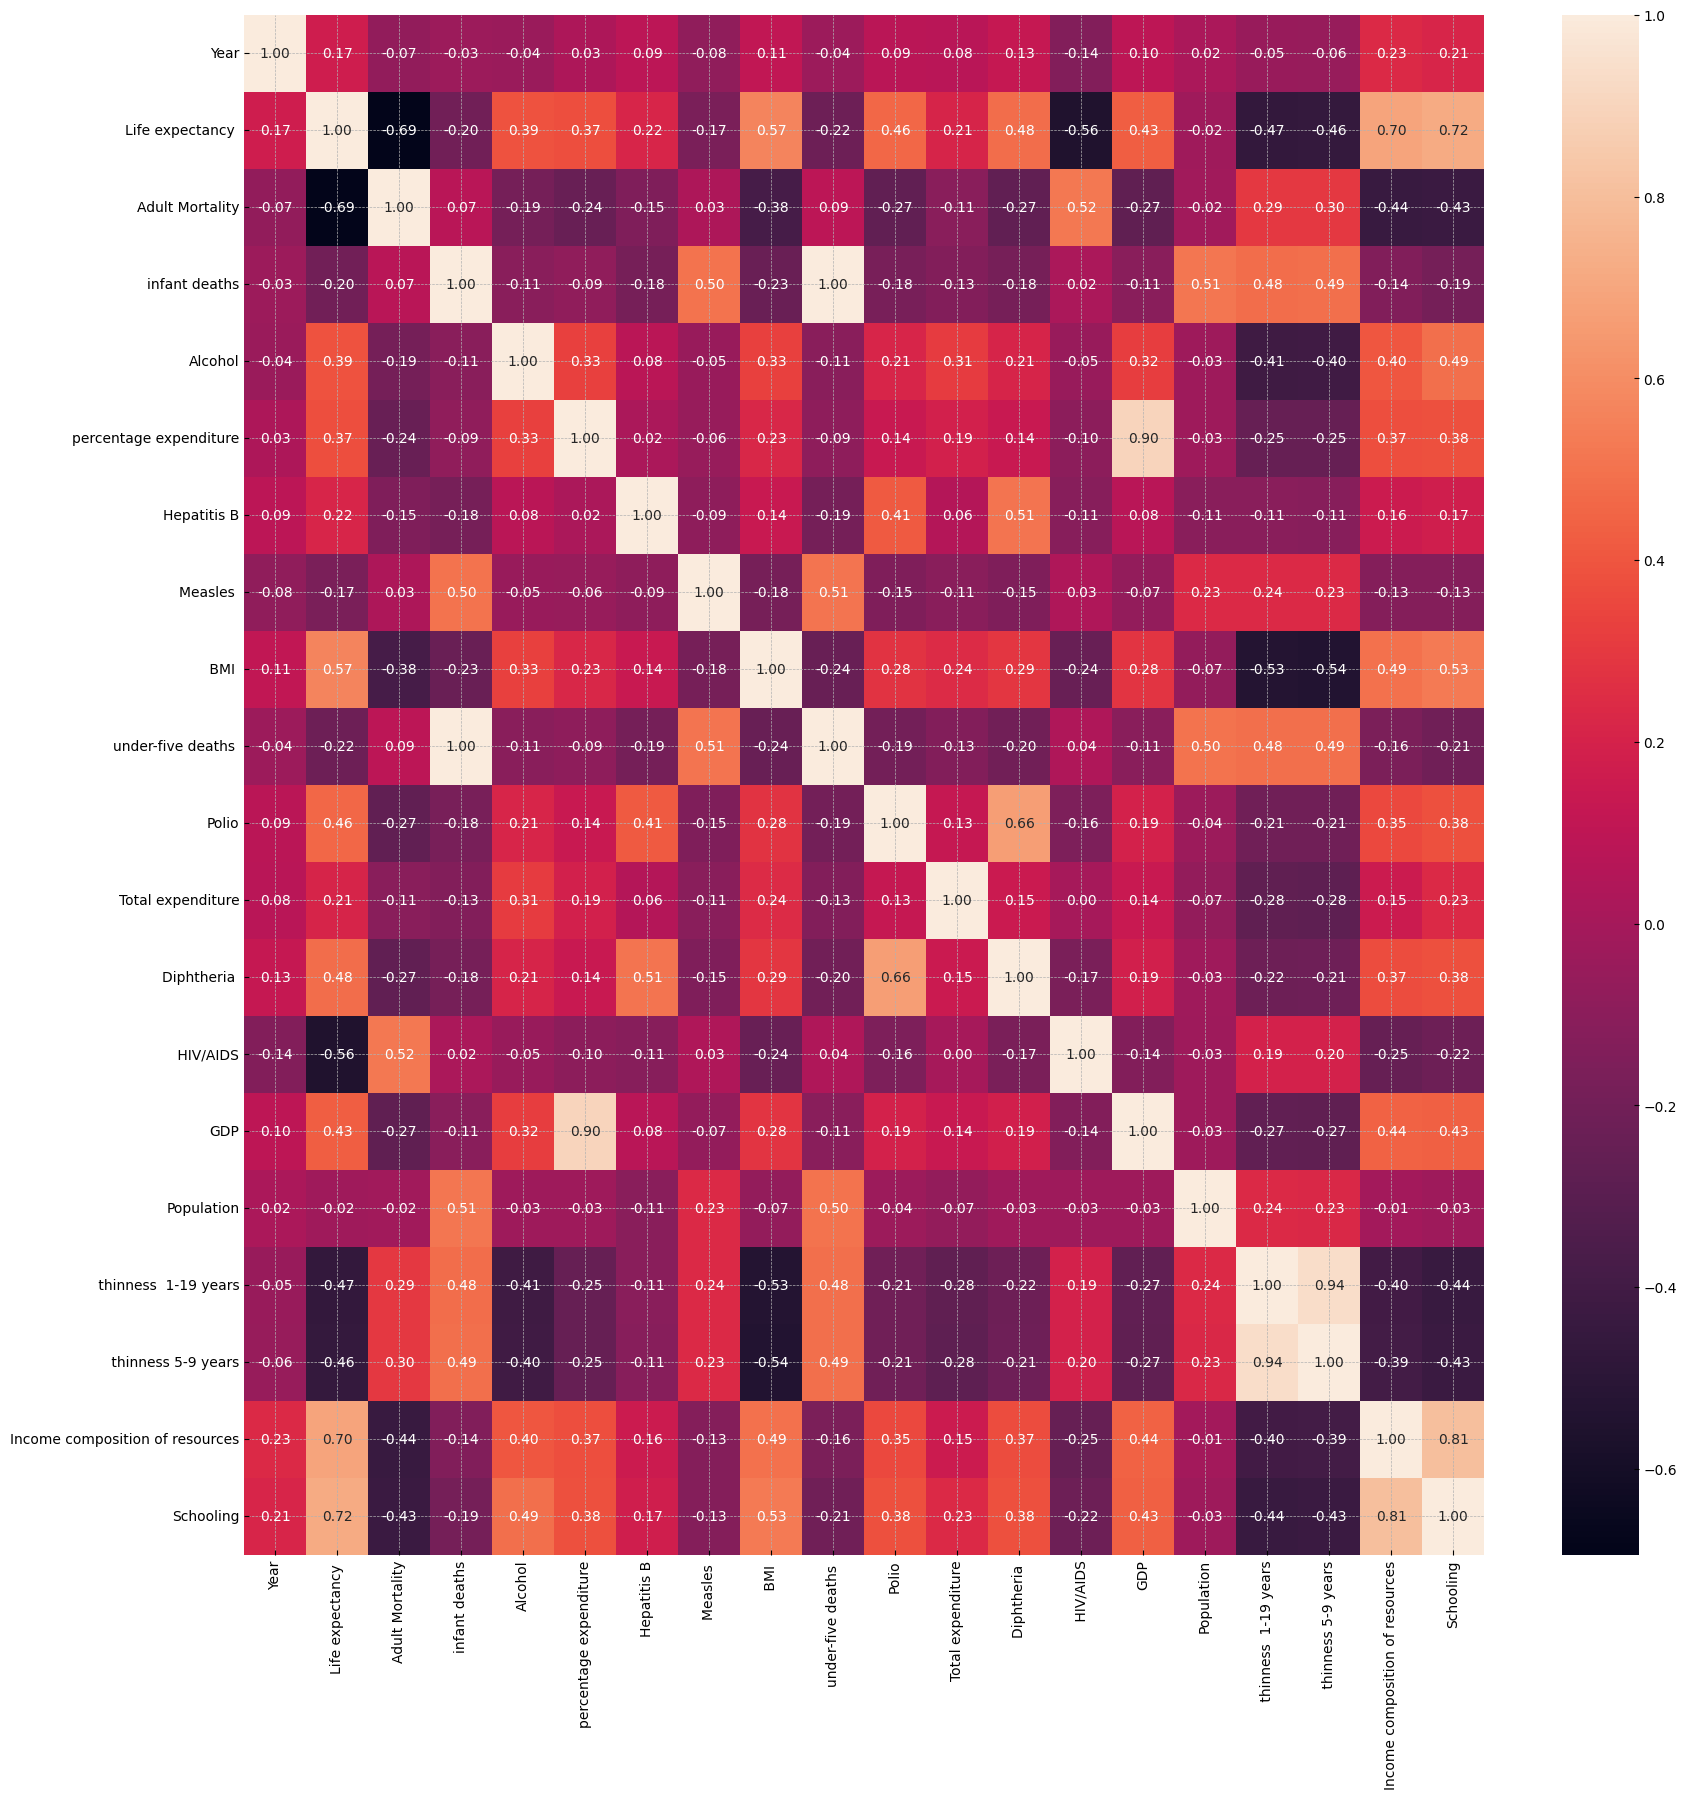

In [47]:
plt.figure(figsize=(20, 20))
sns.heatmap(train.corr(), annot=True, fmt=".2f")

In [48]:
features_to_analyze = train.columns

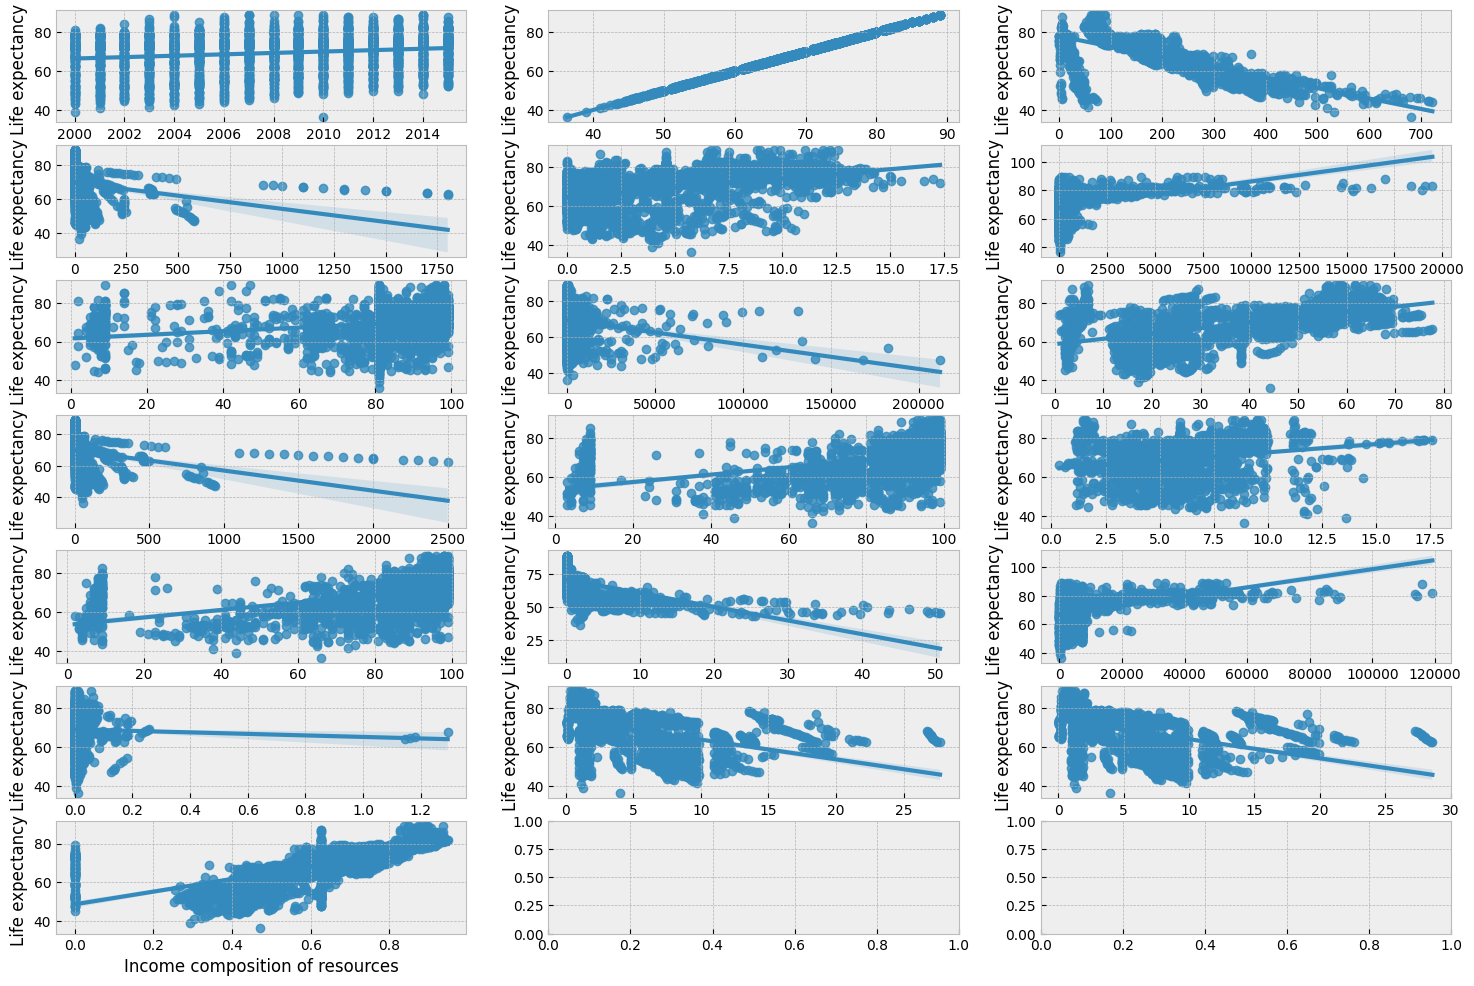

In [58]:
fig, ax = plt.subplots(round(len(features_to_analyze) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyze) - 1:
        sns.regplot(x=features_to_analyze[i],y='Life expectancy ', data=train[features_to_analyze], ax=ax)


In [61]:
train

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
2,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
3,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
4,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,2005,44.6,717.0,28,4.14,8.717409,65.0,420,27.5,43,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
2485,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2486,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2487,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0


In [79]:
x_train = train.drop(columns=["Life expectancy "])
y_train = train["Life expectancy "]

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.3,random_state=0)

In [81]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_val_std=sc.transform(X_val)

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr=LinearRegression()
lr.fit(X_train_std, Y_train)
y_validation_pred=lr.predict(X_val_std)
print(mean_squared_error(y_validation_pred, Y_val))

17.907650096587844


In [83]:
coefficients = lr.coef_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefficients)
})

threshold = 0.5
filtered_features = importance_df[importance_df['Importance'] > threshold]

filtered_features

,Feature,Importance
1,Adult Mortality,2.723176
2,infant deaths,12.562350
3,Alcohol,0.570032
7,BMI,0.844659
8,under-five deaths,12.659278
9,Polio,0.654567
11,Diphtheria,0.900591
12,HIV/AIDS,2.341958
17,Income composition of resources,1.397362
18,Schooling,1.827467


---

In [84]:
filtered_train = X_train[filtered_features["Feature"]]
filtered_val = X_val[filtered_features["Feature"]]

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr=LinearRegression()
lr.fit(filtered_train, Y_train)
y_validation_pred=lr.predict(filtered_val)
print(mean_squared_error(y_validation_pred, Y_val))

17.901776504093085


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

x_train = train.drop(columns=["Life expectancy "])
y_train = train["Life expectancy "]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_train, test_size=0.2, random_state=42)

model = Ridge()
model.fit(X_train, y_train)
preds = model.predict(X_test)

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print(mean_squared_error(preds, y_test))

Cross-Validation Scores: [0.87033799 0.88315996 0.90233356 0.90568495 0.7635978 ]
Mean CV Score: 0.8650228512076774
13.797642722891112


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

x_train = train.drop(columns=["Life expectancy "])
y_train = train["Life expectancy "]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_train, test_size=0.2, random_state=42)

model = Lasso(alpha=0.1)
model.fit(X_train, y_train)
preds = model.predict(X_test)

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print(mean_squared_error(preds, y_test))

Cross-Validation Scores: [0.88491121 0.89680307 0.8928207  0.90932624 0.86966372]
Mean CV Score: 0.8907049861581546
9.514467489170228


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

x_train = train.drop(columns=["Life expectancy "])
y_train = train["Life expectancy "]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_train, test_size=0.2, random_state=42)

model = Lasso(alpha=0.06)
model.fit(X_train, y_train)
preds = model.predict(X_test)

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print(mean_squared_error(preds, y_test))

Cross-Validation Scores: [0.88596357 0.90030988 0.89982935 0.90977787 0.87505247]
Mean CV Score: 0.8941866290725283
9.436568557377953


In [109]:
test_scaled = scaler.transform(test)
test_poly = poly.transform(test_scaled)

preds = model.predict(test_poly)

In [111]:
out_df = pd.DataFrame({'index': np.arange(len(preds)), "Life expectancy": preds})
out_df

,index,Life expectancy
0,0,76.135317
1,1,74.988689
2,2,74.866908
3,3,61.713861
4,4,67.143590
...,...,...
434,434,64.452246
435,435,72.967748
436,436,76.010335
437,437,83.507939


In [112]:
out_df.to_csv("out.csv", index=False)